<a href="https://colab.research.google.com/github/rashokatwal/image-to-music-recommender/blob/main/dataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing required libraries

In [ ]:
!pip install torch torchvision matplotlib numpy opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

Downloading and extracting ADE20K Dataset

In [ ]:
import os
import zipfile

# Create a directory for the dataset
os.makedirs("ADE20K", exist_ok=True)

# Download the dataset
!wget -O ADE20K.zip http://data.csail.mit.edu/places/ADEchallenge/ADEChallengeData2016.zip

# Extract the dataset
with zipfile.ZipFile("ADE20K.zip", 'r') as zip_ref:
    zip_ref.extractall("ADE20K")

print("Dataset downloaded and extracted!")

--2025-03-21 15:32:02--  http://data.csail.mit.edu/places/ADEchallenge/ADEChallengeData2016.zip
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.131.233
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.131.233|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://data.csail.mit.edu/places/ADEchallenge/ADEChallengeData2016.zip [following]
--2025-03-21 15:32:02--  https://data.csail.mit.edu/places/ADEchallenge/ADEChallengeData2016.zip
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.131.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 967382037 (923M) [application/zip]
Saving to: ‘ADE20K.zip’

ADE20K.zip          100%[===================>] 922.57M  15.1MB/s    in 63s     

2025-03-21 15:33:06 (14.6 MB/s) - ‘ADE20K.zip’ saved [967382037/967382037]

Dataset downloaded and extracted!


Exploring the Dataset

In [ ]:
# List files in the dataset
dataset_path = "ADE20K/ADEChallengeData2016"
print("Images:", os.listdir(f"{dataset_path}/images/training"))
print("Annotations:", os.listdir(f"{dataset_path}/annotations/training"))

Images: ['ADE_train_00019439.jpg', 'ADE_train_00004861.jpg', 'ADE_train_00010739.jpg', 'ADE_train_00011365.jpg', 'ADE_train_00013632.jpg', 'ADE_train_00006527.jpg', 'ADE_train_00011658.jpg', 'ADE_train_00006743.jpg', 'ADE_train_00014782.jpg', 'ADE_train_00018944.jpg', 'ADE_train_00008057.jpg', 'ADE_train_00012549.jpg', 'ADE_train_00011636.jpg', 'ADE_train_00004805.jpg', 'ADE_train_00002274.jpg', 'ADE_train_00005088.jpg', 'ADE_train_00000228.jpg', 'ADE_train_00015571.jpg', 'ADE_train_00007274.jpg', 'ADE_train_00017225.jpg', 'ADE_train_00017267.jpg', 'ADE_train_00014909.jpg', 'ADE_train_00016823.jpg', 'ADE_train_00017146.jpg', 'ADE_train_00009376.jpg', 'ADE_train_00000810.jpg', 'ADE_train_00003985.jpg', 'ADE_train_00015465.jpg', 'ADE_train_00006502.jpg', 'ADE_train_00003950.jpg', 'ADE_train_00009146.jpg', 'ADE_train_00016026.jpg', 'ADE_train_00001236.jpg', 'ADE_train_00003462.jpg', 'ADE_train_00002239.jpg', 'ADE_train_00004614.jpg', 'ADE_train_00003008.jpg', 'ADE_train_00008693.jpg', 'AD

In [ ]:
# import torch
# from torch.utils.data import Dataset, DataLoader
# from PIL import Image
# import numpy as np
# import os
# import torchvision.transforms as transforms

# class ADE20KDataset(Dataset):
#     def __init__(self, image_dir, annotation_dir, image_transform=None, mask_transform=None):
#         self.image_dir = image_dir
#         self.annotation_dir = annotation_dir
#         self.image_transform = image_transform
#         self.mask_transform = mask_transform
#         self.images = os.listdir(image_dir)

#     def __len__(self):
#         return len(self.images)

#     def __getitem__(self, idx):
#         img_name = self.images[idx]
#         img_path = os.path.join(self.image_dir, img_name)
#         annotation_path = os.path.join(self.annotation_dir, img_name.replace(".jpg", ".png"))

#         image = Image.open(img_path).convert("RGB")
#         annotation = Image.open(annotation_path).convert("L")  # Load mask as grayscale

#         # Apply transformations
#         if self.image_transform:
#             image = self.image_transform(image)
#         if self.mask_transform:
#             annotation = self.mask_transform(annotation)

#         # Convert mask to long tensor (important for segmentation tasks)
#         annotation = annotation.squeeze(0).long()  # Remove extra channel dimension

#         return image, annotation

Loading and Preprocessing the Data

In [ ]:
# # Define paths to training data
# dataset_path = "ADE20K/ADEChallengeData2016"
# train_image_dir = os.path.join(dataset_path, "images/training")
# train_annotation_dir = os.path.join(dataset_path, "annotations/training")

# # Image transformations
# image_transform = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# # Mask transformations (use PILToTensor to keep original values)
# mask_transform = transforms.Compose([
#     transforms.Resize((256, 256), transforms.InterpolationMode.NEAREST),
#     transforms.PILToTensor()  # Keeps values as they are (0-255)
# ])

Verifying mask shape and value

In [ ]:
# # Get a batch of data
# images, masks = next(iter(train_loader))

# # Check mask shape and values
# print("Mask shape:", masks[0].shape)  # Should be [1, 256, 256]
# print("Unique mask values:", torch.unique(masks[0]))  # Should be class indices (e.g., 0, 1, 2, ...)

Opening a mask file

In [ ]:
# from PIL import Image
# import numpy as np

# # Path to a mask file
# mask_path = "ADE20K/ADEChallengeData2016/annotations/training/ADE_train_00000001.png"

# # Open the mask
# mask = Image.open(mask_path)
# mask = np.array(mask)

# # Check unique values
# print("Unique mask values:", np.unique(mask))

Creating Dataset and Dataloader

In [ ]:
# # Create dataset
# train_dataset = ADE20KDataset(
#     train_image_dir,
#     train_annotation_dir,
#     image_transform=image_transform,
#     mask_transform=mask_transform
# )

# # Create DataLoader
# train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# # Check a batch of data
# for images, masks in train_loader:
#     print("Images shape:", images.shape)  # [batch_size, 3, 256, 256]
#     print("Masks shape:", masks.shape)   # [batch_size, 256, 256]
#     print("Unique mask values:", torch.unique(masks))  # Should be class indices
#     break

Visualizing the Data

In [ ]:
# # Check a batch of data
# for images, masks in train_loader:
#     print("Images shape:", images.shape)  # [batch_size, 3, 256, 256]
#     print("Masks shape:", masks.shape)   # [batch_size, 256, 256]
#     print("Unique mask values:", torch.unique(masks))  # Should be class indices
#     break

# # Visualization function
# def reverse_normalize(image):
#     mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
#     std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
#     return image * std + mean

# # Get a batch of data
# images, masks = next(iter(train_loader))

# # Plot the first image and mask
# image = reverse_normalize(images[0]).permute(1, 2, 0).numpy()  # Convert to HWC
# mask = masks[0].numpy()  # No need to squeeze

# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.title("Image")
# plt.imshow(image)
# plt.axis("off")

# plt.subplot(1, 2, 2)
# plt.title("Mask")
# plt.imshow(mask, cmap="jet")  # Use 'jet' for better visualization
# plt.axis("off")

# plt.show()

Final code for Data Visualization

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Images shape: torch.Size([16, 3, 256, 256])
Masks shape: torch.Size([16, 256, 256])
Unique mask values: tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         15,  16,  18,  20,  21,  22,  23,  24,  25,  26,  28,  31,  33,  35,
         37,  38,  39,  40,  41,  44,  48,  49,  57,  58,  65,  66,  67,  72,
         73,  76,  79,  81,  82,  83,  88,  90,  99, 111, 113, 116, 117, 119,
        120, 126, 131, 133, 136, 137, 138, 143, 148, 149])


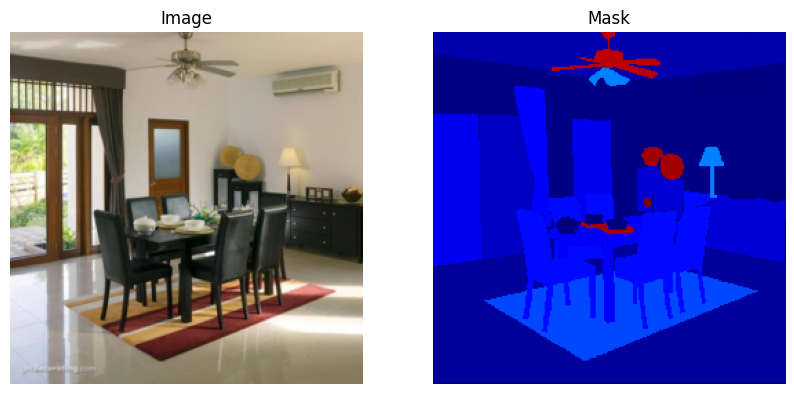

In [ ]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define paths to training data
dataset_path = "ADE20K/ADEChallengeData2016"
train_image_dir = os.path.join(dataset_path, "images/training")
train_annotation_dir = os.path.join(dataset_path, "annotations/training")

# Image transformations
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Mask transformations (use PILToTensor to keep original values)
mask_transform = transforms.Compose([
    transforms.Resize((256, 256), transforms.InterpolationMode.NEAREST),
    transforms.PILToTensor()  # Keeps values as they are (0-255)
])

# Dataset class
class ADE20KDataset(Dataset):
    def __init__(self, image_dir, annotation_dir, image_transform=None, mask_transform=None):
        self.image_dir = image_dir
        self.annotation_dir = annotation_dir
        self.image_transform = image_transform
        self.mask_transform = mask_transform
        self.images = os.listdir(image_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.image_dir, img_name)
        annotation_path = os.path.join(self.annotation_dir, img_name.replace(".jpg", ".png"))

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(annotation_path).convert("L")  # Load mask as grayscale

        # Apply transformations
        if self.image_transform:
            image = self.image_transform(image)
        if self.mask_transform:
            mask = self.mask_transform(mask)

        # Convert mask to LongTensor and remove extra channel dimension
        mask = mask.squeeze(0).long()

        return image, mask

# Create dataset
train_dataset = ADE20KDataset(
    train_image_dir,
    train_annotation_dir,
    image_transform=image_transform,
    mask_transform=mask_transform
)

# Create DataLoader
train_loader = DataLoader(
    train_dataset,
    batch_size=16,  # Choose as per your GPU memory
    shuffle=True,
    num_workers=4,  # Increase if you have more CPU cores
    pin_memory=True,  # Speeds up GPU transfers
    prefetch_factor=2  # Preloads batches while training
)

# Check a batch of data
for images, masks in train_loader:
    print("Images shape:", images.shape)  # [batch_size, 3, 256, 256]
    print("Masks shape:", masks.shape)   # [batch_size, 256, 256]
    print("Unique mask values:", torch.unique(masks))  # Should be class indices
    break

# Visualization function
def reverse_normalize(image):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    return image * std + mean

# Get a batch of data
images, masks = next(iter(train_loader))

# Plot the first image and mask
image = reverse_normalize(images[0]).permute(1, 2, 0).numpy()  # Convert to HWC
mask = masks[0].numpy()  # No need to squeeze

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Mask")
plt.imshow(mask, cmap="jet")  # Use 'jet' for better visualization
plt.axis("off")

plt.show()


Implementing U-Net in PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=150):  # ADE20K has 150 classes
        super(UNet, self).__init__()

        # Encoder (Downsampling Path)
        self.encoder1 = self.conv_block(in_channels, 64)
        self.encoder2 = self.conv_block(64, 128)
        self.encoder3 = self.conv_block(128, 256)
        self.encoder4 = self.conv_block(256, 512)

        # Bottleneck
        self.bottleneck = self.conv_block(512, 1024)

        # Decoder (Upsampling Path)
        self.upconv4 = self.upconv_block(1024, 512)
        self.decoder4 = self.conv_block(1024, 512)  # 1024 = 512 (upconv) + 512 (skip)
        self.upconv3 = self.upconv_block(512, 256)
        self.decoder3 = self.conv_block(512, 256)  # 512 = 256 (upconv) + 256 (skip)
        self.upconv2 = self.upconv_block(256, 128)
        self.decoder2 = self.conv_block(256, 128)  # 256 = 128 (upconv) + 128 (skip)
        self.upconv1 = self.upconv_block(128, 64)
        self.decoder1 = self.conv_block(128, 64)  # 128 = 64 (upconv) + 64 (skip)

        # Final layer
        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def upconv_block(self, in_channels, out_channels):
        return nn.ConvTranspose2d(
            in_channels, out_channels, kernel_size=2, stride=2
        )

    def forward(self, x):
        # Encoder
        e1 = self.encoder1(x)  # [batch_size, 64, H, W]
        e2 = self.encoder2(F.max_pool2d(e1, kernel_size=2, stride=2))  # [batch_size, 128, H/2, W/2]
        e3 = self.encoder3(F.max_pool2d(e2, kernel_size=2, stride=2))  # [batch_size, 256, H/4, W/4]
        e4 = self.encoder4(F.max_pool2d(e3, kernel_size=2, stride=2))  # [batch_size, 512, H/8, W/8]

        # Bottleneck
        bottleneck = self.bottleneck(F.max_pool2d(e4, kernel_size=2, stride=2))  # [batch_size, 1024, H/16, W/16]

        # Decoder with skip connections
        d4 = self.upconv4(bottleneck)  # [batch_size, 512, H/8, W/8]
        d4 = torch.cat((d4, e4), dim=1)  # Skip connection
        d4 = self.decoder4(d4)  # [batch_size, 512, H/8, W/8]

        d3 = self.upconv3(d4)  # [batch_size, 256, H/4, W/4]
        d3 = torch.cat((d3, e3), dim=1)  # Skip connection
        d3 = self.decoder3(d3)  # [batch_size, 256, H/4, W/4]

        d2 = self.upconv2(d3)  # [batch_size, 128, H/2, W/2]
        d2 = torch.cat((d2, e2), dim=1)  # Skip connection
        d2 = self.decoder2(d2)  # [batch_size, 128, H/2, W/2]

        d1 = self.upconv1(d2)  # [batch_size, 64, H, W]
        d1 = torch.cat((d1, e1), dim=1)  # Skip connection
        d1 = self.decoder1(d1)  # [batch_size, 64, H, W]

        # Final layer
        out = self.final_conv(d1)  # [batch_size, out_channels, H, W]
        return out

# Instantiate the model
model = UNet(in_channels=3, out_channels=150)  # ADE20K has 150 classes
print(model)

UNet(
  (encoder1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (encoder2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (encoder3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=T

Defining the Loss Function

In [ ]:
# Define the loss function
criterion = nn.CrossEntropyLoss()

Defining the Optimizer

In [ ]:
import torch.optim as optim

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Learning rate can be adjusted

Moving the Model to GPU

In [ ]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move the model to the GPU
model = model.to(device)

Using device: cuda


Debugging

In [ ]:
# for images, masks in train_loader:
#     print("Masks unique values (before to(device)):", torch.unique(masks))  # Check mask values

#     images, masks = images.to(device), masks.to(device)  # Move to GPU

Training Loop

In [ ]:
import os
import torch
from tqdm import tqdm  # ✅ For progress bar

# ✅ Enable CUDA optimizations
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
torch.backends.cudnn.benchmark = True

# ✅ Training parameters
num_epochs = 10
num_classes = 150
scaler = torch.cuda.amp.GradScaler()  # Mixed precision training

# ✅ Training loop with tqdm progress bar
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    print(f"\n🔄 Training Epoch {epoch+1}/{num_epochs}...")
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}")

    for batch_idx, (images, masks) in progress_bar:
        images, masks = images.to(device, non_blocking=True), masks.to(device, non_blocking=True).long()

        # ✅ Ensure mask values are within [0, num_classes - 1]
        masks = torch.clamp(masks, min=0, max=num_classes - 1)

        optimizer.zero_grad()

        # ✅ Use AMP for faster training
        with torch.cuda.amp.autocast():
            outputs = model(images)
            assert outputs.shape[1] == num_classes, f"Expected {num_classes}, got {outputs.shape[1]}"
            loss = criterion(outputs, masks)

        # ✅ Mixed Precision Backpropagation
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()

        # ✅ Update tqdm progress bar
        progress_bar.set_postfix(loss=loss.item())

    # ✅ Print loss per epoch
    epoch_loss = running_loss / len(train_loader)
    print(f"✅ Epoch [{epoch+1}/{num_epochs}] - Avg Loss: {epoch_loss:.4f}")


🔄 Training Epoch 1/10...


<ipython-input-9-3566a39502ec>:12: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()  # Mixed precision training
Epoch 1:   0%|          | 0/1264 [00:00<?, ?it/s]<ipython-input-9-3566a39502ec>:31: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Epoch 1: 100%|██████████| 1264/1264 [09:51<00:00,  2.14it/s, loss=3.55]

✅ Epoch [1/10] - Avg Loss: 2.6764

🔄 Training Epoch 2/10...



Epoch 2: 100%|██████████| 1264/1264 [09:57<00:00,  2.11it/s, loss=3.62]

✅ Epoch [2/10] - Avg Loss: 2.2656

🔄 Training Epoch 3/10...



Epoch 3: 100%|██████████| 1264/1264 [09:57<00:00,  2.12it/s, loss=2.82]

✅ Epoch [3/10] - Avg Loss: 2.1183

🔄 Training Epoch 4/10...



Epoch 4: 100%|██████████| 1264/1264 [09:59<00:00,  2.11it/s, loss=4.35]

✅ Epoch [4/10] - Avg Loss: 2.0167

🔄 Training Epoch 5/10...



Epoch 5: 100%|██████████| 1264/1264 [09:57<00:00,  2.11it/s, loss=2.41]

✅ Epoch [5/10] - Avg Loss: 1.9381

🔄 Training Epoch 6/10...



Epoch 6: 100%|██████████| 1264/1264 [09:56<00:00,  2.12it/s, loss=4.65]

✅ Epoch [6/10] - Avg Loss: 1.8834

🔄 Training Epoch 7/10...



Epoch 7: 100%|██████████| 1264/1264 [09:57<00:00,  2.12it/s, loss=1.58]

✅ Epoch [7/10] - Avg Loss: 1.8236

🔄 Training Epoch 8/10...



Epoch 8: 100%|██████████| 1264/1264 [09:55<00:00,  2.12it/s, loss=3.32]

✅ Epoch [8/10] - Avg Loss: 1.7774

🔄 Training Epoch 9/10...



Epoch 9: 100%|██████████| 1264/1264 [09:55<00:00,  2.12it/s, loss=2.22]

✅ Epoch [9/10] - Avg Loss: 1.7288

🔄 Training Epoch 10/10...



Epoch 10: 100%|██████████| 1264/1264 [09:55<00:00,  2.12it/s, loss=4.52]

✅ Epoch [10/10] - Avg Loss: 1.6884


In [ ]:
# Save the model
torch.save(model.state_dict(), "/content/drive/unet_ade20k.pth")

RuntimeError: File /content/drive/unet_ade20k.pth cannot be opened.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
save_dir = "/content/drive/My Drive/MyModels"
os.makedirs(save_dir, exist_ok=True)
save_path = f"{save_dir}/model.pth"
torch.save(model.state_dict(), save_path)
print(f"✅ Model saved to: {save_path}")


✅ Model saved to: /content/drive/My Drive/MyModels/model.pth


In [ ]:
def compute_iou(preds, masks):
    """
    Computes the Intersection over Union (IoU) for predicted and ground truth masks.
    Args:
        preds: [batch_size, height, width] (predicted class indices)
        masks: [batch_size, height, width] (ground truth class indices)
    Returns:
        mean IoU score for the batch
    """
    intersection = (preds == masks).sum(dim=(1, 2))  # Pixel-wise intersection per sample
    union = preds.numel() // preds.shape[0]  # Total pixels per sample
    iou = intersection / union
    return iou.mean()  # Return mean IoU across the batch

# ✅ Evaluation loop with tqdm progress bar
model.eval()
total_iou = 0.0

with torch.no_grad():  # Disable gradient computation
    progress_bar = tqdm(train_loader, total=len(train_loader), desc="Evaluating IoU")  # ✅ Added tqdm

    for images, masks in progress_bar:
        images, masks = images.to(device), masks.to(device)

        # ✅ Forward pass
        outputs = model(images)

        # ✅ Get predicted class indices
        preds = torch.argmax(outputs, dim=1)  # Shape: [batch_size, height, width]

        # ✅ Compute IoU
        iou = compute_iou(preds, masks)
        total_iou += iou.item()

        # ✅ Update tqdm progress bar
        progress_bar.set_postfix(iou=iou.item())

# ✅ Print final IoU score
avg_iou = total_iou / len(train_loader)
print(f"✅ Average IoU: {avg_iou:.4f}")

Evaluating IoU: 100%|██████████| 1264/1264 [05:53<00:00,  3.57it/s, iou=0.275]

✅ Average IoU: 0.5554


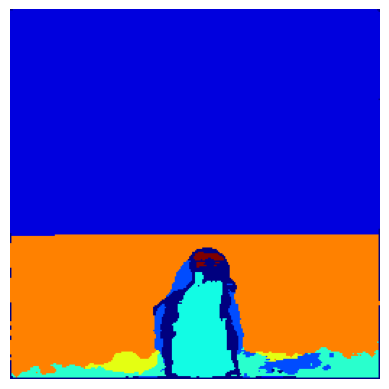

In [ ]:
# Load the trained model
model.load_state_dict(torch.load("unet_ade20k.pth"))
model.eval()

# Load and preprocess a new image
new_image = Image.open("/content/drive/MyDrive/Dwarka/IMG_20250224_030931.jpg").convert("RGB")
new_image = image_transform(new_image).unsqueeze(0).to(device)  # Add batch dimension

# Make a prediction
with torch.no_grad():
    output = model(new_image)
    pred_mask = torch.argmax(output, dim=1).squeeze(0).cpu().numpy()  # Remove batch dimension

# Visualize the prediction
plt.imshow(pred_mask, cmap="jet")
plt.axis("off")
plt.show()

In [ ]:
# pip install segmentation-models-pytorch

In [ ]:
# import segmentation_models_pytorch as smp

# # Define UperNet with a pre-trained backbone
# model = smp.UperNet(
#     encoder_name="resnet50",        # Pre-trained backbone
#     encoder_weights="imagenet",     # Use ImageNet pre-trained weights
#     in_channels=3,                  # Input channels (RGB images)
#     classes=150,                    # Number of output classes (ADE20K has 150 classes)
# )

In [ ]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

In [ ]:
# import torch.nn as nn
# import torch.optim as optim

# # Define the loss function
# criterion = nn.CrossEntropyLoss()

# # Define the optimizer
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# import os
# import torch

# # Enable CUDA debugging (if needed)
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# # Enable cuDNN benchmark for faster training
# torch.backends.cudnn.benchmark = True

# # Number of epochs and classes
# num_epochs = 10
# num_classes = 150  # Ensure this matches dataset

# # Initialize AMP GradScaler
# scaler = torch.cuda.amp.GradScaler()

# # Gradient accumulation steps
# accumulation_steps = 4

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     optimizer.zero_grad()

#     print(f"Training epoch {epoch+1}/{num_epochs}")
#     for i, (images, masks) in enumerate(train_loader):
#         images = images.to(device)
#         masks = masks.to(device).long()  # Convert masks to long type

#         # ✅ Debugging: Print unique mask values
#         print("Unique mask values before clamping:", torch.unique(masks))

#         # ✅ Ensure mask values are within [0, num_classes - 1]
#         masks = torch.clamp(masks, min=0, max=num_classes - 1)

#         print("Unique mask values after clamping:", torch.unique(masks))

#         # ✅ Use AMP for faster training
#         with torch.cuda.amp.autocast():
#             outputs = model(images)

#             # ✅ Check output shape
#             assert outputs.shape[1] == num_classes, f"Expected {num_classes} classes, got {outputs.shape[1]}"

#             loss = criterion(outputs, masks) / accumulation_steps  # Normalize loss

#         # ✅ Use AMP Scaler for backpropagation
#         scaler.scale(loss).backward()

#         # Update weights every `accumulation_steps` batches
#         if (i + 1) % accumulation_steps == 0:
#             scaler.step(optimizer)
#             scaler.update()
#             optimizer.zero_grad()

#         running_loss += loss.item() * accumulation_steps

#     # Print loss per epoch
#     epoch_loss = running_loss / len(train_loader)
#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

In [ ]:
# model.eval()  # Set the model to evaluation mode
# total_iou = 0.0

# with torch.no_grad():
#     for images, masks in train_loader:  # Use validation loader in practice
#         images = images.to(device)
#         masks = masks.to(device)

#         # Forward pass
#         outputs = model(images)

#         # Get predicted class indices
#         preds = torch.argmax(outputs, dim=1)  # Shape: [batch_size, height, width]

#         # Compute IoU
#         intersection = (preds == masks).sum()
#         union = preds.numel()  # Total number of pixels
#         iou = intersection / union
#         total_iou += iou.item()

# # Print average IoU
# avg_iou = total_iou / len(train_loader)
# print(f"Average IoU: {avg_iou:.4f}")

Parsing objectInfo150.txt file from dataset

In [ ]:
# Path to the objectInfo150.txt file
object_info_path = "/content/ADE20K/ADEChallengeData2016/objectInfo150.txt"

# Read the file and extract class names
class_names = []
with open(object_info_path, "r") as f:
    lines = f.readlines()
    for line in lines[1:]:  # Skip the header line
        parts = line.strip().split("\t")
        class_names.append(parts[4])  # Class name is in the 5th column

# Print the first 10 class names
print("Class names:", class_names[:10])

Class names: ['wall', 'building, edifice', 'sky', 'floor, flooring', 'tree', 'ceiling', 'road, route', 'bed', 'windowpane, window', 'grass']


Parsing sceneCategories.txt file from dataset

In [ ]:
# Path to the sceneCategories.txt file
scene_categories_path = "/content/ADE20K/ADEChallengeData2016/sceneCategories.txt"

# Read the file and extract scene categories
scene_categories = {}
with open(scene_categories_path, "r") as f:
    for line in f:
        parts = line.strip().split()
        image_name = parts[0]
        scene_category = parts[1]
        scene_categories[image_name] = scene_category

# Print the first 5 scene categories
print("Scene categories:", list(scene_categories.items())[:5])

Scene categories: [('ADE_train_00000001', 'airport_terminal'), ('ADE_train_00000002', 'airport_terminal'), ('ADE_train_00000003', 'art_gallery'), ('ADE_train_00000004', 'badlands'), ('ADE_train_00000005', 'ball_pit')]
